# Dataset

In this Notebook we are going to use an opinion poll Chilean dataset. 

In [71]:
!git clone https://github.com/MinCiencia/Politicas

fatal: destination path 'Politicas' already exists and is not an empty directory.


In [72]:
import pandas as pd
consulta = pd.read_csv('/content/Politicas/Politica_Igualdad_de_Genero/bbdd_consulta_publica.csv')
consulta = consulta[["P1 TRANSCRIPCIÓN: ¿Por qué cree ud. que Chile necesita una política de igualdad de género en CTCI?", "P2 TRANSCRIPCIÓN: ¿Qué medidas cree usted que garantizan el acceso, el desarrollo y el liderazgo de mujeres en el sistema CTCI?","P3 TRANSCRIPCIÓN: Respecto al Eje 2, ¿de qué manera se podría incorporar la perspectiva de género en su disciplina o área de desempeño?",'P4 TRANSCRIPCIÓN: Teniendo en cuenta el Eje 3, ¿qué acciones debería adoptar su institución  y otras instituciones del sistema de CTCI  para garantizar una  política de igualdad de género efectiva?']]
print('Datos con valores NaN: ',len(consulta))
consulta = consulta.dropna(axis=0)
print('Datos sin valores NaN: ',len(consulta))

Datos con valores NaN:  1524
Datos sin valores NaN:  1342


 Cleaning the dataset with the data_cleaning's methods

In [73]:
question = consulta.columns[0]
corpus_sent = consulta[consulta.columns[0]].values.tolist()[0]

In [74]:
print(f"Question: {question}\nAnswer example: {corpus_sent}")

Question: P1 TRANSCRIPCIÓN: ¿Por qué cree ud. que Chile necesita una política de igualdad de género en CTCI?
Answer example: Brindar oportunidades restitutivas de desigualdades estructurales en la educación nacional


In [ ]:
!pip3 install -r requirements.txt
!python -m spacy download en_core_web_sm
import data_cleaning.spanish as sp

In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer

cleaned_doc_train,entities = sp.corpus(dataset=consulta[consulta.columns[0]].values.tolist())
X_train_preprocessed = [" ".join(words_list) for words_list in cleaned_doc_train]


In [77]:
def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

In [78]:
#words=cleaned_doc_train
#bigram_mod = bigrams(words)
#bigram = [bigram_mod[review] for review in words]

In [229]:
import itertools

#all the words of the corpus are in a list
corpus_words = list(itertools.chain.from_iterable(cleaned_doc_train))

In [242]:
import gensim.corpora as corpora
#Dictonary-> TF-IDF / Bag of words

id2word = corpora.Dictionary(cleaned_doc_train)
corpus = [id2word.doc2bow(text) for text in cleaned_doc_train]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [81]:
for i in range(len(corpus[2])):
  print("Word {} (\"{}\") appears {} time.".format(corpus[2][i][0], id2word[corpus[2][i][0]], corpus[2][i][1]))


Word 5 ("oportunidad") appears 1 time.
Word 10 ("academicar") appears 1 time.
Word 11 ("ambiente") appears 1 time.
Word 12 ("aun") appears 1 time.
Word 13 ("bajo") appears 1 time.
Word 14 ("brecha") appears 1 time.
Word 15 ("carrera") appears 1 time.
Word 16 ("competir") appears 1 time.
Word 17 ("desempenir") appears 1 time.
Word 18 ("dificultar") appears 1 time.
Word 19 ("eliminar") appears 1 time.
Word 20 ("erradicar") appears 1 time.
Word 21 ("estandar") appears 2 time.
Word 22 ("existir") appears 1 time.
Word 23 ("hecho") appears 1 time.
Word 24 ("hombre") appears 1 time.
Word 25 ("institución") appears 1 time.
Word 26 ("machista") appears 1 time.
Word 27 ("mala") appears 1 time.
Word 28 ("mayor") appears 1 time.
Word 29 ("medir") appears 1 time.
Word 30 ("mejor") appears 1 time.
Word 31 ("mujer") appears 2 time.
Word 32 ("obstaculo") appears 1 time.
Word 33 ("practica") appears 1 time.
Word 34 ("promover") appears 1 time.
Word 35 ("propio") appears 1 time.
Word 36 ("realidad") app


# Topic Modeling
Topic modelling is recognizing the words from the topics present in the document or the corpus of data.

*   Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), Probabilistic Latent Semantic Analysis (PLSA), and Non-Negative Matrix Factorization (NMF). 

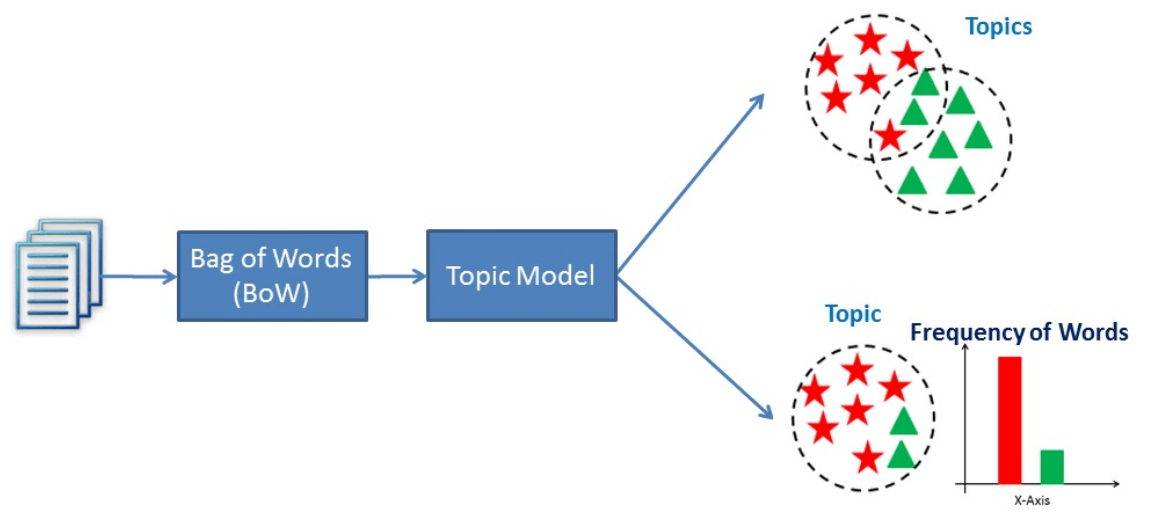


In [243]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
import gensim

def compute_coherence_values(dictionary, corpus, texts, id2word, limit, start=2, step=3, model_ ='LDA'):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    model_ : model type
    Returns:
    -------
    model_list : List of LDA/LSI topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)
        if model_ == 'LSI':
          model =  gensim.models.LsiModel(corpus=corpus,id2word=id2word,num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())


    plt.plot(range(start, limit, step), coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.title('Best number of topics with '+model_+' model')
    plt.legend(("coherence values"), loc='best')
    plt.show()

    return model_list, coherence_values

# Latent Dirichlet Allocation (LDA)
LDA is a probabilistic method. For each document the results give us a mix of topics that make up that document. To be precise, we get a probability distribution over the k topics for each document. Each word in the document is attributed to a particular topic with probability given by this distribution.

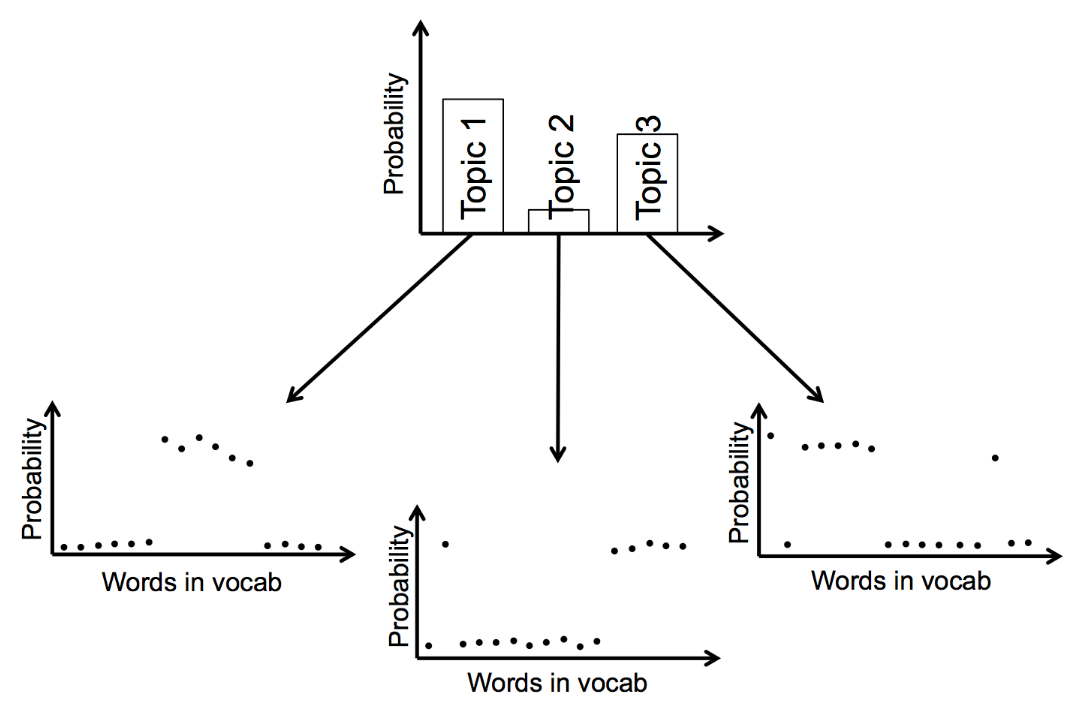

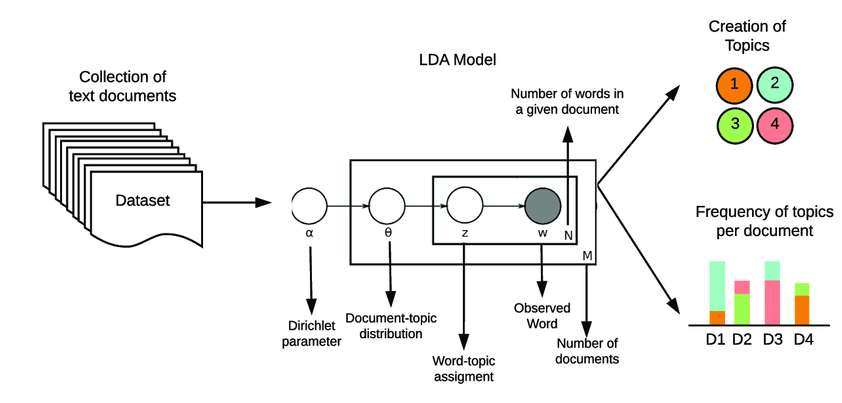

Alpha: is the document-topic density
Beta: (In Python, this parameter is called ‘eta’): is the topic word density
 

For, the higher values of alpha —> the documents will be composed of more topics, and
The lower values of alpha —> returns documents with fewer topics.
Similarly, for the values of Beta:

The higher beta —> has more number of words in a given topic, and
The lower value of beta —> topics contains few words.

### Using the method compute_coherence_values

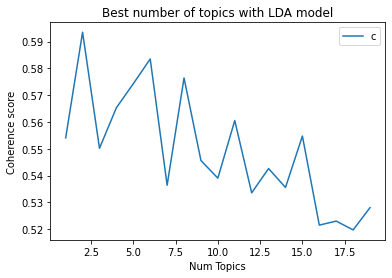

In [244]:
import warnings
warnings.filterwarnings("ignore")
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, id2word=id2word, texts=cleaned_doc_train, start=1, limit=20, step=1, model_='LDA')

In [245]:
#Defining the model with higher coherence score
lda_model = model_list[coherence_values.index(max(coherence_values))]

In [246]:
print('Best Coherence Score: ', max(coherence_values))
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

Best Coherence Score:  0.5934630785277635

Perplexity:  -7.181396676315192


In [247]:
from pprint import pprint 
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"mujer" + 0.017*"genero" + 0.011*"hombre" + 0.011*"existir" + '
  '0.011*"brecha" + 0.010*"ciencia" + 0.009*"ser" + 0.008*"poder" + 0.008*"si" '
  '+ 0.008*"ctci"'),
 (1,
  '0.031*"mujer" + 0.025*"genero" + 0.017*"igualdad" + 0.012*"ciencia" + '
  '0.009*"ser" + 0.009*"deber" + 0.008*"oportunidad" + 0.008*"desarrollo" + '
  '0.008*"necesitar" + 0.008*"hombre"')]


In [87]:
print(f'Sentence: {X_train_preprocessed[2]}')
for index, score in sorted(lda_model[corpus[2]], key=lambda tup: -1*tup[1]):
  print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

Sentence: eliminar brecha obstaculo dificultar carrera academicar mujer erradicar mala practica machista aun existir institución promover mayor mejor oportunidad mujer desempenir ambiente seguro bajo estandar propio tratar competir medir él estandar hecho hombre vivir realidad

Score: 0.9565069675445557	 
Topic: 0.029*"mujer" + 0.016*"genero" + 0.014*"igualdad" + 0.010*"hombre" + 0.009*"ciencia" + 0.008*"poder" + 0.008*"deber" + 0.008*"necesario" + 0.008*"oportunidad" + 0.008*"ser"

Score: 0.04349298030138016	 
Topic: 0.029*"mujer" + 0.027*"genero" + 0.012*"ciencia" + 0.010*"igualdad" + 0.010*"ser" + 0.010*"desarrollo" + 0.009*"existir" + 0.008*"hombre" + 0.008*"deber" + 0.008*"oportunidad"


In [249]:
for i, row in enumerate(doc_lda[0:10]):
  row = sorted(row, key=lambda x: (x[1]), reverse=True)
 # pprint(row[0])
  for j, (topic_num,prop_topic) in enumerate(row):
    if j == 0:  
      wp = lda_model.show_topic(topic_num)
      topic_keywords = ", ".join([word for word, prop in wp])
      print(f'The phrase: {X_train_preprocessed[i]}.\nBelongs to the topic # {str(int(topic_num))} with {round(prop_topic,4)} score\n')
    else:
      break

The phrase: brindar oportunidad restitutiva desigualdad estructural educacion nacional.
Belongs to the topic # 0 with 0.8629000186920166 score

The phrase: construir sociedad justo.
Belongs to the topic # 1 with 0.7095999717712402 score

The phrase: eliminar brecha obstaculo dificultar carrera academicar mujer erradicar mala practica machista aun existir institución promover mayor mejor oportunidad mujer desempenir ambiente seguro bajo estandar propio tratar competir medir él estandar hecho hombre vivir realidad.
Belongs to the topic # 0 with 0.9703999757766724 score

The phrase: necesidad equidad.
Belongs to the topic # 1 with 0.7390000224113464 score

The phrase: porcentaje participacion mujer bajo area necesitar representado.
Belongs to the topic # 1 with 0.5271000266075134 score

The phrase: mujer hombr deber comprender reconocer problematica asociado discriminacion desigualdad genero persistir sociedad entonces poder resolver él él cambio cultural deber iniciar él nino nina deber 

# Latent Semantic Index (LSI)
LSI learns latent topics by performing a matrix decomposition on the document-term matrix using Singular value decomposition. LSA is typically used as a dimension reduction or noise reducing technique.

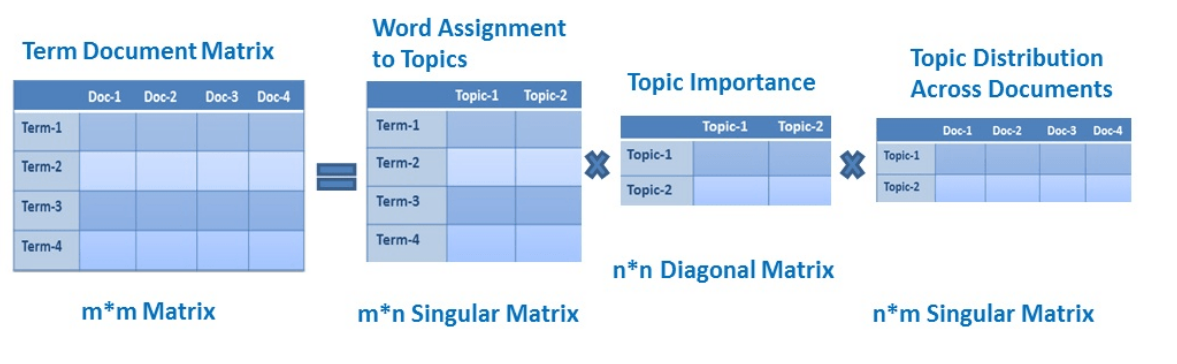

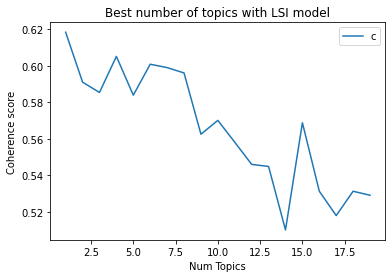

In [286]:
import warnings
warnings.filterwarnings("ignore")
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, id2word=id2word, texts=cleaned_doc_train, start=1, limit=20, step=1, model_='LSI')

In [287]:
#Defining the model with higher coherence score
lsi_model = model_list[coherence_values.index(max(coherence_values))]

In [288]:
import warnings
warnings.filterwarnings("ignore")
print('Best Coherence Score: ', max(coherence_values))

Best Coherence Score:  0.6184378084157973


In [289]:
from pprint import pprint 
pprint(lsi_model.print_topics())
doc_lsi = lsi_model[corpus]

[(0,
  '0.505*"mujer" + 0.347*"genero" + 0.210*"hombre" + 0.192*"ser" + '
  '0.192*"ciencia" + 0.190*"igualdad" + 0.174*"deber" + 0.123*"poder" + '
  '0.122*"existir" + 0.117*"desarrollo"')]


In [27]:
print(f'Sentence: {X_train_preprocessed[2]}')
for index, score in sorted(lsi_model[corpus[2]], key=lambda tup: -1*tup[1]):
  print("\nScore: {}\t \nTopic: {}".format(score, lsi_model.print_topic(index, 10)))

Sentence: eliminar brecha obstaculo dificultar carrera academicar mujer erradicar mala practica machista aun existir institución promover mayor mejor oportunidad mujer desempenir ambiente seguro bajo estandar propio tratar competir medir él estandar hecho hombre vivir realidad

Score: 2.018416664089244	 
Topic: 0.505*"mujer" + 0.347*"genero" + 0.210*"hombre" + 0.192*"ser" + 0.192*"ciencia" + 0.190*"igualdad" + 0.174*"deber" + 0.123*"poder" + 0.122*"existir" + 0.117*"desarrollo"


In [28]:
for i, row in enumerate(doc_lsi[0:10]):
  row = sorted(row, key=lambda x: (x[1]), reverse=True)
  for j, (topic_num,prop_topic) in enumerate(row):
    if j == 0:  
      wp = lsi_model.show_topic(topic_num)
      topic_keywords = ", ".join([word for word, prop in wp])
      print(f'The phrase: {X_train_preprocessed[i]}.\nBelongs to the topic # {str(int(topic_num))} with {round(prop_topic,4)} score\n')
    else:
      break

The phrase: brindar oportunidad restitutiva desigualdad estructural educacion nacional.
Belongs to the topic # 0 with 0.1424 score

The phrase: construir sociedad justo.
Belongs to the topic # 0 with 0.0905 score

The phrase: eliminar brecha obstaculo dificultar carrera academicar mujer erradicar mala practica machista aun existir institución promover mayor mejor oportunidad mujer desempenir ambiente seguro bajo estandar propio tratar competir medir él estandar hecho hombre vivir realidad.
Belongs to the topic # 0 with 2.0184 score

The phrase: necesidad equidad.
Belongs to the topic # 0 with 0.0353 score

The phrase: porcentaje participacion mujer bajo area necesitar representado.
Belongs to the topic # 0 with 0.7381 score

The phrase: mujer hombr deber comprender reconocer problematica asociado discriminacion desigualdad genero persistir sociedad entonces poder resolver él él cambio cultural deber iniciar él nino nina deber incorporar hombre masculinidad conviccion nuevo direccion be

# Visualization methods

## Words frecuency (using wordcloud library)

brindar,oportunidad,restitutiva,desigualdad,estructural,educacion,nacional,construir,sociedad,justo,
{'mujer': 1.0, 'genero': 0.4248496993987976, 'ciencia': 0.4168336673346693, 'ser': 0.3627254509018036, 'existir': 0.35671342685370744, 'poder': 0.3026052104208417, 'deber': 0.2985971943887776, 'desarrollo': 0.2905811623246493, 'hombre': 0.2865731462925852, 'igualdad genero': 0.2865731462925852, 'investigacion': 0.27054108216432865, 'ctci': 0.26452905811623245, 'si': 0.2625250501002004, 'sociedad': 0.24849699398797595, 'él': 0.23046092184368738, 'hacer': 0.22444889779559118, 'pai': 0.21442885771543085, 'solo': 0.2124248496993988, 'necesario': 0.20240480961923848, 'persona': 0.20240480961923848, 'area': 0.19438877755511022, 'necesitar': 0.18837675350701402, 'hombre mujer': 0.18837675350701402, 'oportunidad': 0.1743486973947896, 'mayor': 0.17234468937875752, 'ambito': 0.16633266533066132, 'trabajo': 0.16633266533066132, 'discriminacion': 0.16432865731462926, 'acceso': 0.16032064128256512, 

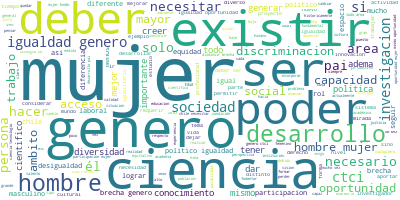

In [250]:
from wordcloud import WordCloud

#Most frequent words
long_string = ','.join(corpus_words)
print(long_string[0:100])

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)
print(wordcloud.words_)
wordcloud.to_image()

## Bar chart word count and weights of Topic Keywords

In [312]:
from collections import Counter
import seaborn as sns
import matplotlib.colors as mcolors

def word_count_weight_keywords(model, dataset_cleaned, size_figure=(24,10)):
    topics = model.show_topics(formatted=False)
    data_flat = [w for w_list in dataset_cleaned for w in w_list]
    counter = Counter(data_flat)

    out = []
    for i, topic in topics:
        for word, weight in topic:
            out.append([word, i , weight, counter[word]])

    df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    if len(model.show_topics())==1:
      fig,ax = plt.subplots(len(model.show_topics()), figsize=size_figure, sharey=True)
      ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==0, :], color=cols[0], width=0.5, alpha=0.3, label='Word Count')
      ax_twin = ax.twinx()
      ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==0, :], color=cols[0], width=0.2, label='Weights')
      ax.set_ylabel('Word Count', color=cols[0])
      ax.set_title('Topic: ' + str(0), color=cols[0], fontsize=16)
      ax.tick_params(axis='y', left=False)
      ax.set_xticklabels(df.loc[df.topic_id==0, 'word'], rotation=30, horizontalalignment= 'right')
      ax.legend(loc='upper right'); ax_twin.legend(loc='center right')  
    else:
      # Plot Word Count and Weights of Topic Keywords
      fig, axes = plt.subplots(len(model.show_topics()), figsize=size_figure, sharey=True)
      for i, ax in enumerate(axes.flatten()):
          ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
          ax_twin = ax.twinx()
          ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
          ax.set_ylabel('Word Count', color=cols[i])
          ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
          ax.tick_params(axis='y', left=False)
          ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
          ax.legend(loc='upper right'); ax_twin.legend(loc='center right')
    fig.tight_layout(w_pad=2)    
    fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
    plt.show()
    return df

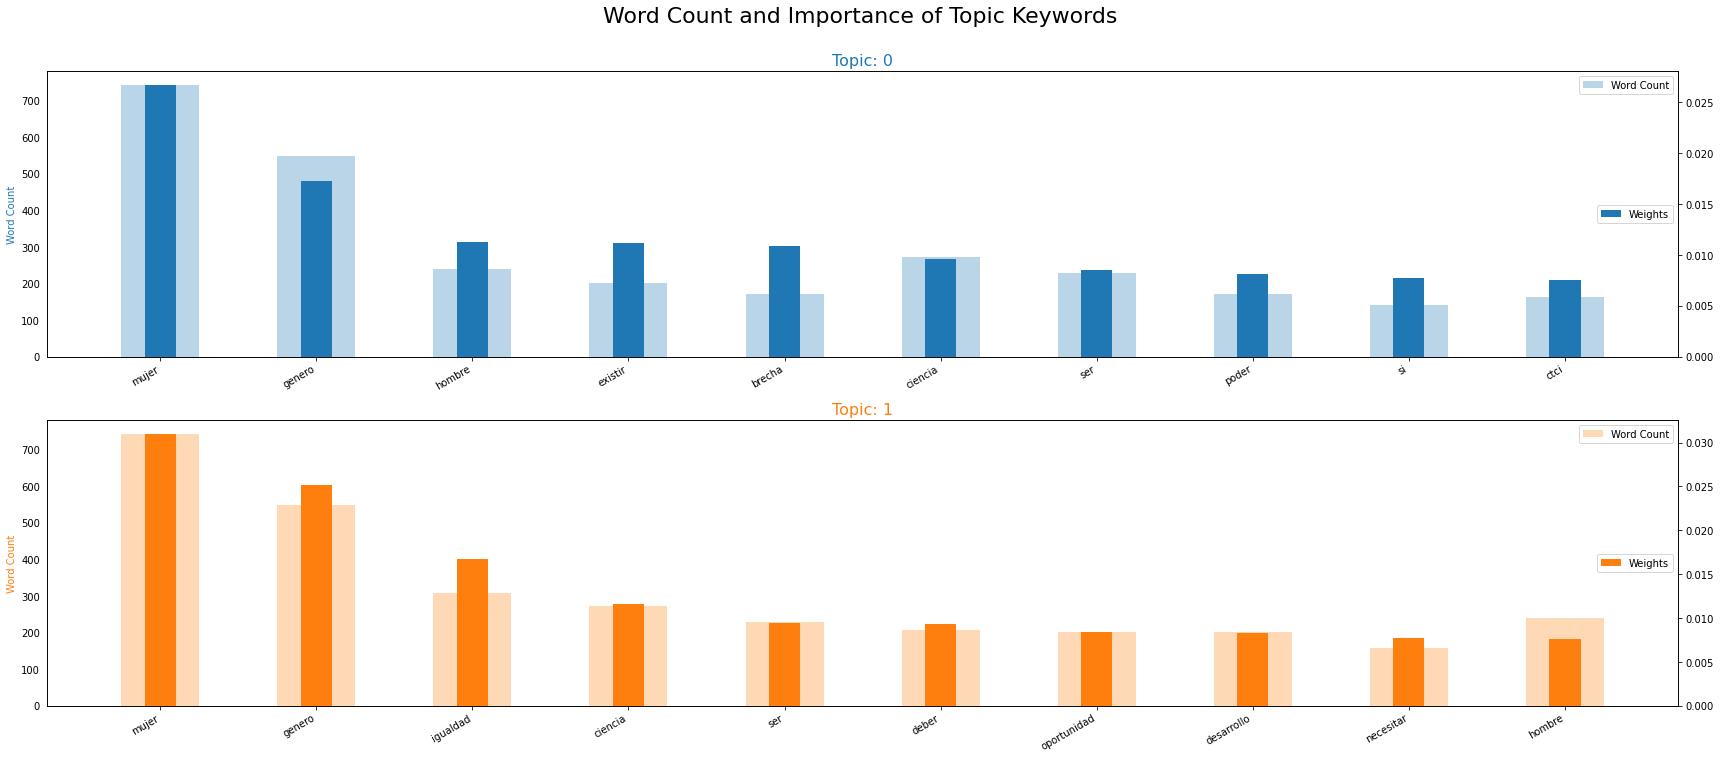

In [313]:
df_key_cw_lda = word_count_weight_keywords(lda_model, cleaned_doc_train)

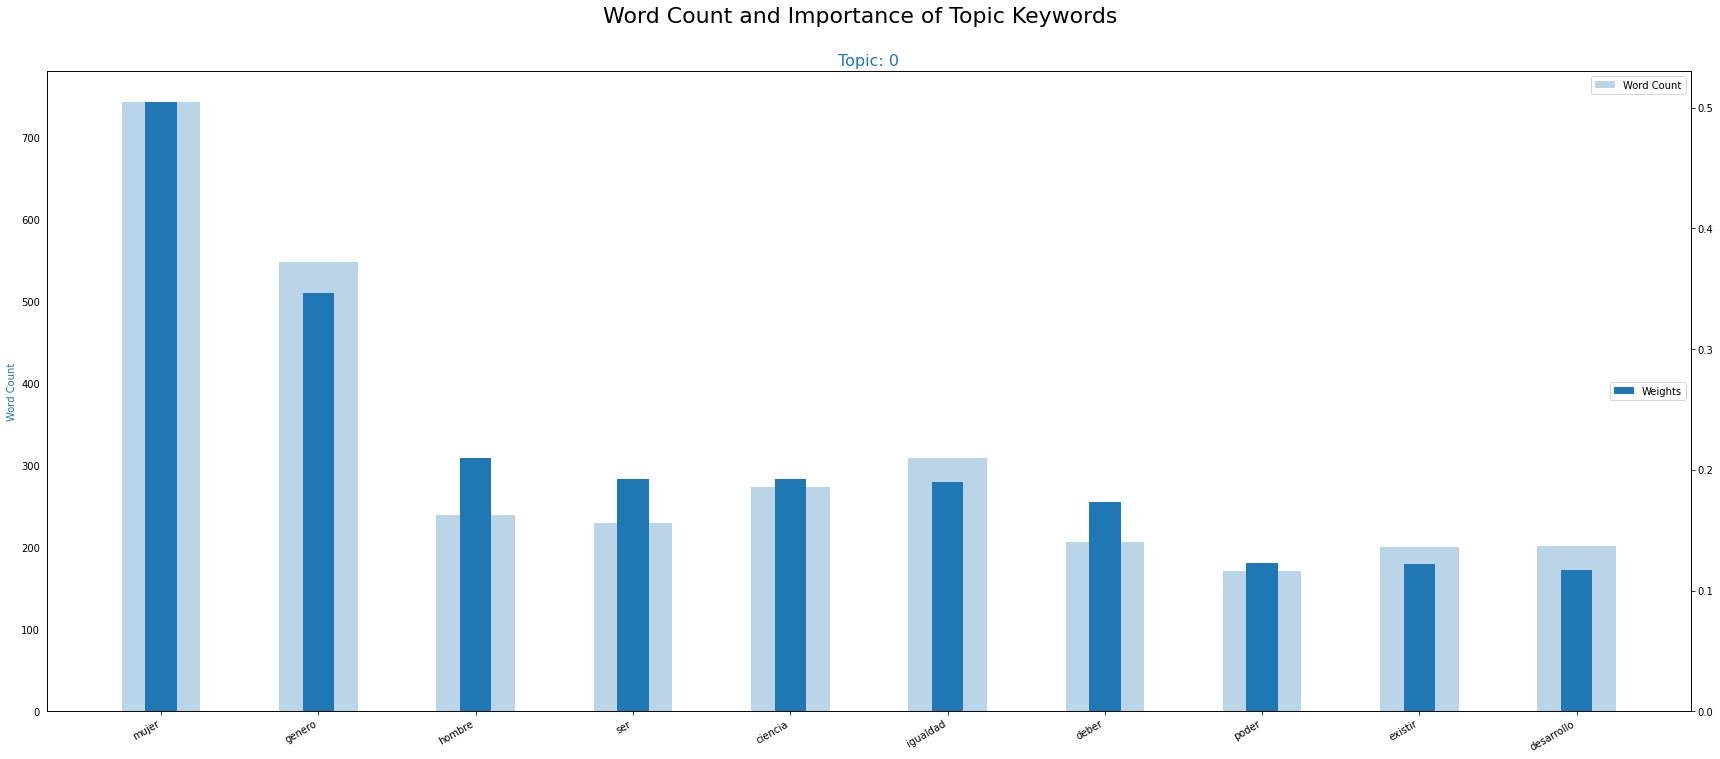

In [314]:
df_key_cw_lsi = word_count_weight_keywords(lsi_model, cleaned_doc_train)

## pyLDAvis visualization of topics

This library only works with LDA models.
- The parameter R is the number of words that appears in the right side (default = 30)

In [316]:
import pyLDAvis
import pyLDAvis.gensim
import pickle 
import os

def LDA_visual(lda_model,words,corpus,id2word):
    # Visualize the topics
    pyLDAvis.enable_notebook()

    LDAvis_data_filepath = os.path.join('/content/ldavis_tuned_')
    if 1 == 1:
        LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,R=words)
        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)

    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)

    pyLDAvis.save_html(LDAvis_prepared, '/content/ldavis_tuned_.html')

    return LDAvis_prepared

LDAvis_prepared = LDA_visual(lda_model=lda_model,words=15,corpus=corpus,id2word=id2word)

In [317]:
LDAvis_prepared

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.015189  0.0       1        1  54.149937
0     -0.015189  0.0       2        1  45.850063, topic_info=            Term        Freq       Total Category  logprob  loglift
14        brecha  144.000000  144.000000  Default  15.0000  15.0000
22       existir  169.000000  169.000000  Default  14.0000  14.0000
108     igualdad  270.000000  270.000000  Default  13.0000  13.0000
172           si  120.000000  120.000000  Default  12.0000  12.0000
345        chile   86.000000   86.000000  Default  11.0000  11.0000
..           ...         ...         ...      ...      ...      ...
57    desarrollo   75.352597  174.228302   Topic2  -4.8980  -0.0584
5    oportunidad   75.398544  175.117927   Topic2  -4.8974  -0.0629
40            él   64.902887  129.638074   Topic2  -5.0472   0.0879
56         deber   67.832765  179.424469   Topic2  -5.0031  -0.1929
108     igualdad   70.913179  270.324486   Topic2  -4.9587  -0.5584

[96 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
97        1  0.705468      acceso
97        2  0.287413      acceso
2267      1  0.400295  acrecentar
2267      2  0.800589  acrecentar
603       1  0.400356       allar
...     ...       ...         ...
77        2  0.332459        todo
3508      1  0.854079       todxs
3508      2  0.284693       todxs
40        1  0.501396          él
40        2  0.501396          él

[143 rows x 3 columns], R=15, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [318]:
LDAvis_prepared_5words = LDA_visual(lda_model=lda_model,words=5,corpus=corpus,id2word=id2word)
LDAvis_prepared_5words

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.015189  0.0       1        1  54.120865
0     -0.015189  0.0       2        1  45.879135, topic_info=                Term        Freq       Total Category  logprob  loglift
14            brecha  144.000000  144.000000  Default   5.0000   5.0000
22           existir  169.000000  169.000000  Default   4.0000   4.0000
108         igualdad  270.000000  270.000000  Default   3.0000   3.0000
172               si  120.000000  120.000000  Default   2.0000   2.0000
345            chile   86.000000   86.000000  Default   1.0000   1.0000
201        condición   41.630920   49.310901   Topic1  -5.6571   0.4446
2392      compromiso    2.961922    3.521189   Topic1  -8.3001   0.4410
1335          sentar    5.921647    7.042187   Topic1  -7.6074   0.4406
3300    heterosexual    3.647535    4.396715   Topic1  -8.0919   0.4271
2324       paradigma    3.638668    4.395944   Topic1  -8.0944   0.4249
322             areo   27.513982   33.397016   Topic1  -6.0713   0.4202
345            chile   70.110403   86.871433   Topic1  -5.1359   0.3996
108         igualdad  199.304245  270.262388   Topic1  -4.0912   0.3094
115            hacia   32.720491   42.008840   Topic1  -5.8980   0.3641
62            genero  299.356908  473.965342   Topic1  -3.6843   0.1545
31             mujer  369.349724  639.154273   Topic1  -3.4742   0.0655
44         necesitar   92.489516  136.956185   Topic1  -4.8589   0.2214
111          ciencia  138.410066  235.594978   Topic1  -4.4558   0.0821
56             deber  111.531791  179.407567   Topic1  -4.6717   0.1386
171              ser  112.224035  198.233782   Topic1  -4.6655   0.0450
555        favorecer    7.283644    9.136123   Topic2  -7.2351   0.5526
1697   eventualmente    3.269302    4.156729   Topic2  -8.0362   0.5390
2140        cuestión    2.609024    3.325995   Topic2  -8.2618   0.5364
606       motivacion    2.599251    3.326925   Topic2  -8.2656   0.5323
2859         materio    1.935295    2.496541   Topic2  -8.5605   0.5245
14            brecha  110.011586  144.118643   Topic2  -4.5202   0.5091
573        disminuir   32.175969   42.510143   Topic2  -5.7496   0.5006
1482  imprescindible    5.711276    7.498632   Topic2  -7.4783   0.5069
22           existir  113.140344  169.735442   Topic2  -4.4921   0.3735
172               si   78.472386  120.313712   Topic2  -4.8580   0.3518
574       diversidad   36.137018   52.856286   Topic2  -5.6335   0.3989
24            hombre  113.856240  204.518137   Topic2  -4.4858   0.1934
31             mujer  269.804549  639.154273   Topic2  -3.6231  -0.0833
62            genero  174.608434  473.965342   Topic2  -4.0582  -0.2194, token_table=      Topic      Freq            Term
term                                 
322       1  0.838398            areo
322       2  0.179657            areo
14        1  0.235917          brecha
14        2  0.763260          brecha
345       1  0.805788           chile
345       2  0.195691           chile
111       1  0.585751         ciencia
111       2  0.411724         ciencia
2392      1  0.851985      compromiso
2392      2  0.283995      compromiso
201       1  0.851739       condición
201       2  0.162236       condición
2140      1  0.300662        cuestión
2140      2  0.901986        cuestión
56        1  0.624277           deber
56        2  0.379025           deber
573       1  0.235238       disminuir
573       2  0.752762       disminuir
574       1  0.321627      diversidad
574       2  0.681092      diversidad
1697      1  0.240574   eventualmente
1697      2  0.721721   eventualmente
22        1  0.335817         existir
22        2  0.665742         existir
555       1  0.218911       favorecer
555       2  0.766189       favorecer
62        1  0.630848          genero
62        2  0.369225          genero
115       1  0.785549           hacia
115       2  0.214241           hacia
3300      1 

## Dataframe of vocabulary and score per topic 

In [253]:
def top_vocab(model):
      '''
      Gets top vocabulary words for a given LDA model and saves to csv.

      :param lda_model: LDA model to be evaluated
      :param num: number of vocabulary words assigned to each topic
      :return: csv of top words per topic
      '''
      top_words_per_topic = []
      for t in range(model.num_topics):
          top_words_per_topic.extend([(t,) + x for x in model.show_topic(t)])
      return pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])

In [320]:
top_vocab (lda_model)

,Topic,Word,P
0,0,mujer,0.026700
1,0,genero,0.017280
2,0,hombre,0.011267
3,0,existir,0.011197
4,0,brecha,0.010887
5,0,ciencia,0.009618
6,0,ser,0.008512
7,0,poder,0.008124
8,0,si,0.007766
9,0,ctci,0.007544


In [319]:
top_vocab(lsi_model)

,Topic,Word,P
0,0,mujer,0.504723
1,0,genero,0.346806
2,0,hombre,0.210211
3,0,ser,0.192395
4,0,ciencia,0.192273
5,0,igualdad,0.189980
6,0,deber,0.173506
7,0,poder,0.122869
8,0,existir,0.122162
9,0,desarrollo,0.116765


## Dataframe with  the Dominant topic and its percentage contribution in each document

The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output. ([src](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#12.-What-are-the-most-discussed-topics-in-the-documents?))

In [348]:
def format_topics_sentences(corpus, texts, model=None):
    sent_topics_df = pd.DataFrame()
    for i, row_list in enumerate(model[corpus]):
        row = sorted(row_list, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords','Text']
    return(sent_topics_df)

In [333]:

df_topic_keywords_lda = format_topics_sentences(model=lda_model, corpus=corpus, texts=cleaned_doc_train)
df_topic_keywords_lda.head()

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,0.0,0.8629,"mujer, genero, hombre, existir, brecha, ciencia, ser, poder, si, ctci","[brindar, oportunidad, restitutiva, desigualdad, estructural, educacion, nacional]"
1,1.0,0.7096,"mujer, genero, igualdad, ciencia, ser, deber, oportunidad, desarrollo, necesitar, hombre","[construir, sociedad, justo]"
2,0.0,0.9705,"mujer, genero, hombre, existir, brecha, ciencia, ser, poder, si, ctci","[eliminar, brecha, obstaculo, dificultar, carrera, academicar, mujer, erradicar, mala, practica,..."
3,1.0,0.7390,"mujer, genero, igualdad, ciencia, ser, deber, oportunidad, desarrollo, necesitar, hombre","[necesidad, equidad]"
4,1.0,0.5261,"mujer, genero, igualdad, ciencia, ser, deber, oportunidad, desarrollo, necesitar, hombre","[porcentaje, participacion, mujer, bajo, area, necesitar, representado]"


In [334]:

df_topic_keywords_lsi = format_topics_sentences(model=lsi_model, corpus=corpus, texts=cleaned_doc_train)
df_topic_keywords_lsi.head()

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,0.0,0.1424,"mujer, genero, hombre, ser, ciencia, igualdad, deber, poder, existir, desarrollo","[brindar, oportunidad, restitutiva, desigualdad, estructural, educacion, nacional]"
1,0.0,0.0905,"mujer, genero, hombre, ser, ciencia, igualdad, deber, poder, existir, desarrollo","[construir, sociedad, justo]"
2,0.0,2.0184,"mujer, genero, hombre, ser, ciencia, igualdad, deber, poder, existir, desarrollo","[eliminar, brecha, obstaculo, dificultar, carrera, academicar, mujer, erradicar, mala, practica,..."
3,0.0,0.0353,"mujer, genero, hombre, ser, ciencia, igualdad, deber, poder, existir, desarrollo","[necesidad, equidad]"
4,0.0,0.7381,"mujer, genero, hombre, ser, ciencia, igualdad, deber, poder, existir, desarrollo","[porcentaje, participacion, mujer, bajo, area, necesitar, representado]"


## Dataframe with the most representative sentence for each topic

In [363]:
def most_representative_sent(model_,corpus_,texts_):
  df_topic_sents_keywords = format_topics_sentences(model=model_, corpus=corpus_, texts=texts_)
  
  df = pd.DataFrame()
  for i, grp in df_topic_sents_keywords.groupby('Dominant_Topic'):
      df = pd.concat([df, grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],axis=0) 
  df.reset_index(drop=True, inplace=True)
  df.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]
  return df


In [365]:
most_representative_sent_lda = most_representative_sent(lda_model,corpus,cleaned_doc_train)
most_representative_sent_lda

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9950,"mujer, genero, hombre, existir, brecha, ciencia, ser, poder, si, ctci","[i, d, i, generacion, propiedad, intelectual, patente, invencion, base, desarrollo, economico, p..."
1,1.0,0.9927,"mujer, genero, igualdad, ciencia, ser, deber, oportunidad, desarrollo, necesitar, hombre","[brechos, genero, pais, similar, país, diferenciar, varios, alto, porcentaje, persona, alto, niv..."


In [366]:
most_representative_sent_lsi = most_representative_sent(lsi_model,corpus,cleaned_doc_train)
most_representative_sent_lsi

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,24.7484,"mujer, genero, hombre, ser, ciencia, igualdad, deber, poder, existir, desarrollo","[chile, necesitar, politico, igualdad, genero, razón, 1, diferencia, porcentaj, matricula, hombr..."


## Sentence Chart Colored by Topic
LSI doesnt have per_word_topics attribute, so it is not possible to use this function with LSI models.

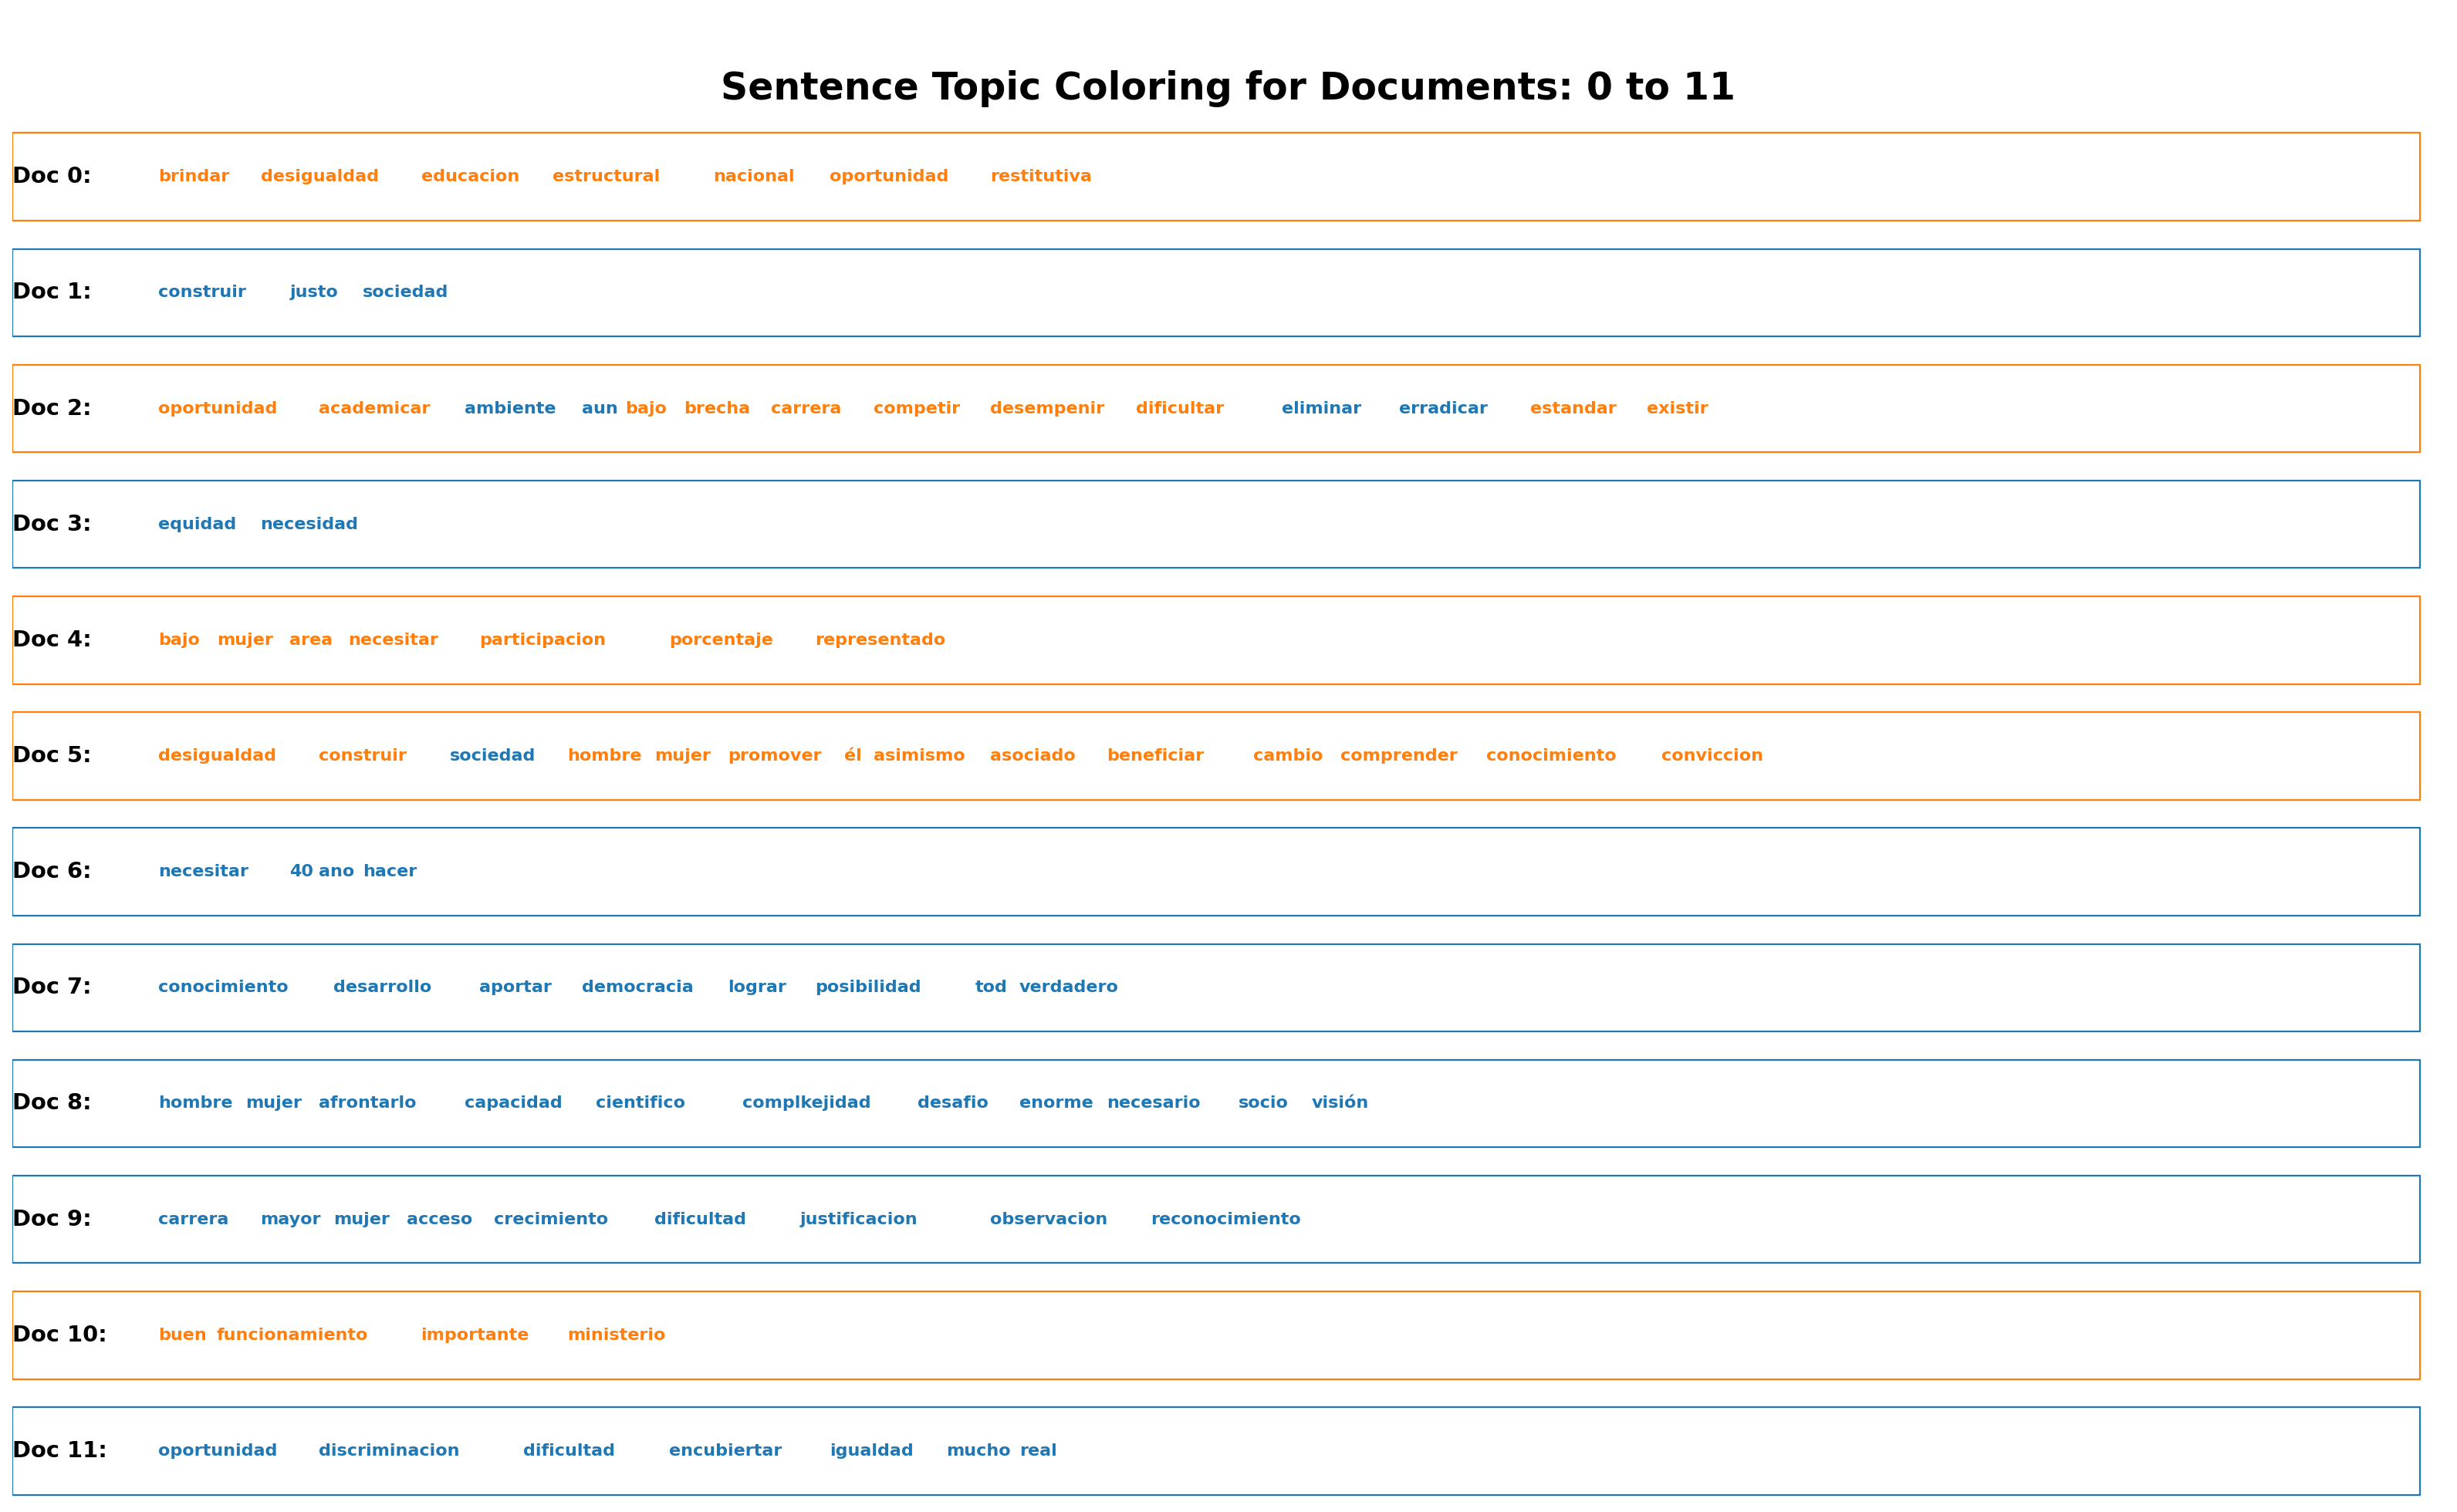

In [370]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(corpus, id2word, num_topics,_model='LDA', start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    if _model =='LDA':
      model =  gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics, per_word_topics=True)
    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = model[corp_cur]
            word_dominanttopic = [(model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.0001, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=13, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=1))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=10, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .006 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, ' ',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart(id2word=id2word, corpus=corpus, num_topics= len(lda_model.show_topics()))    

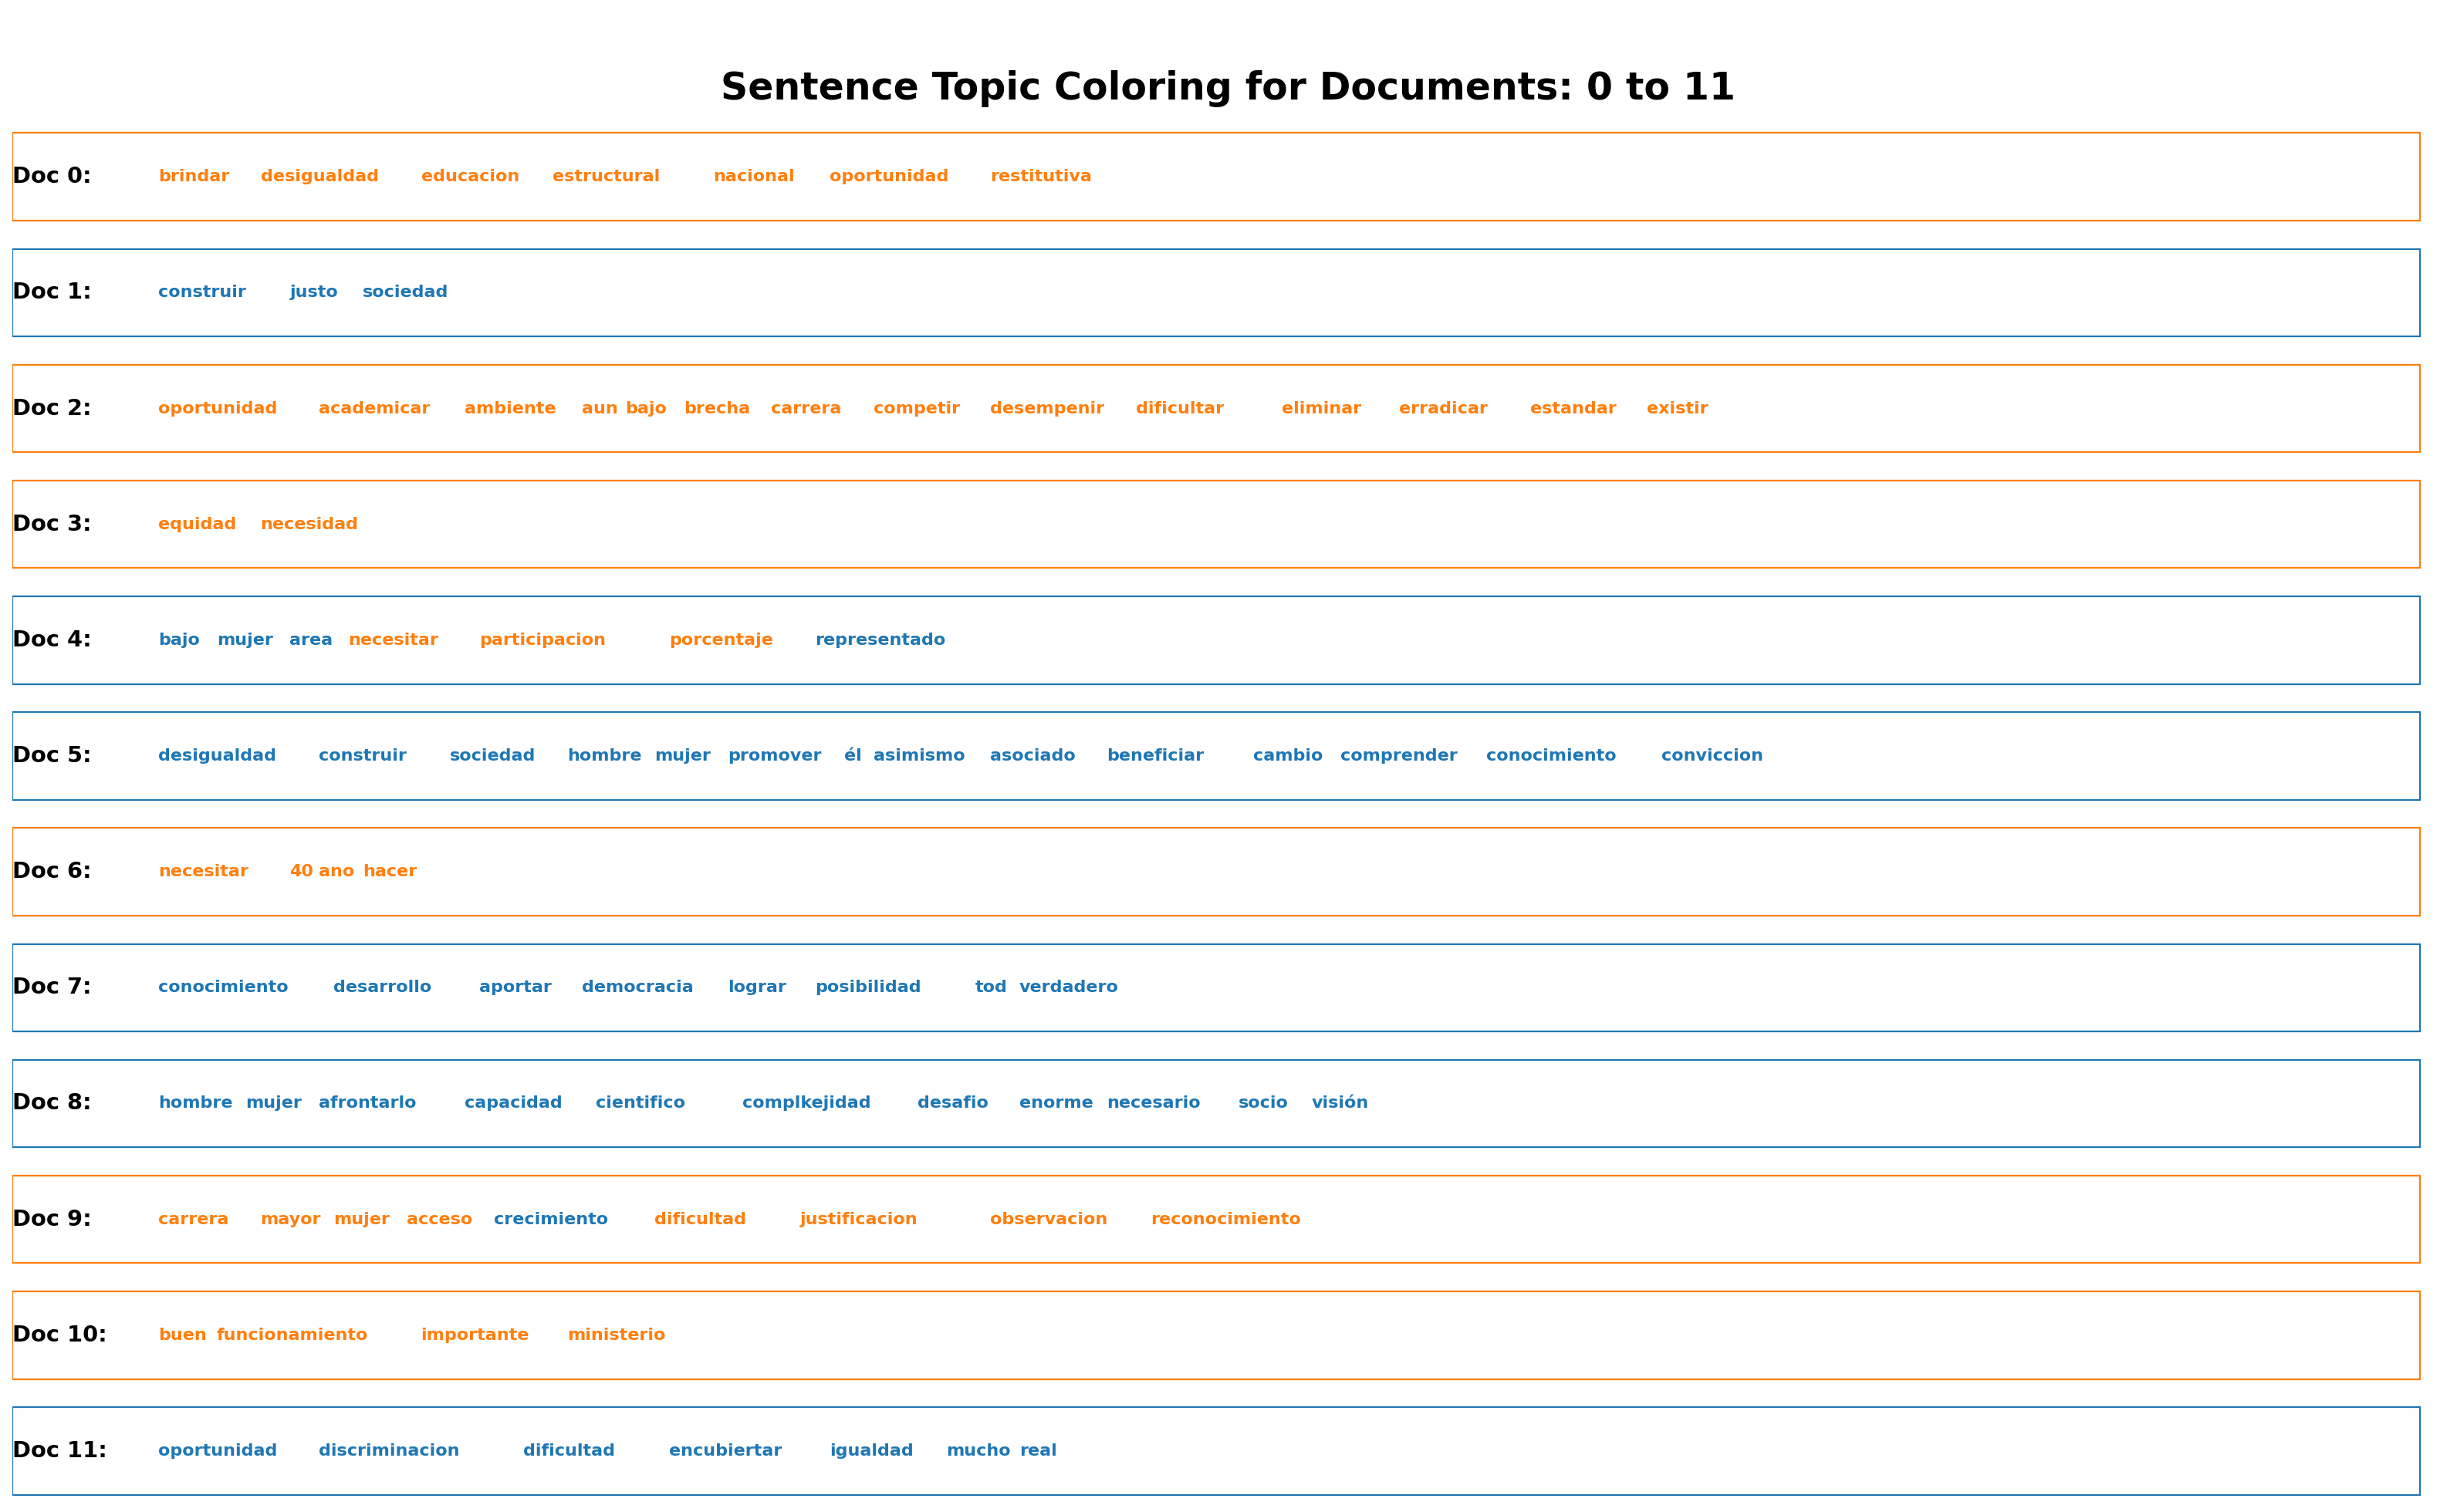

In [371]:
sentences_chart(id2word=id2word, corpus=corpus, num_topics= len(lda_model.show_topics()),_model='LDA')    

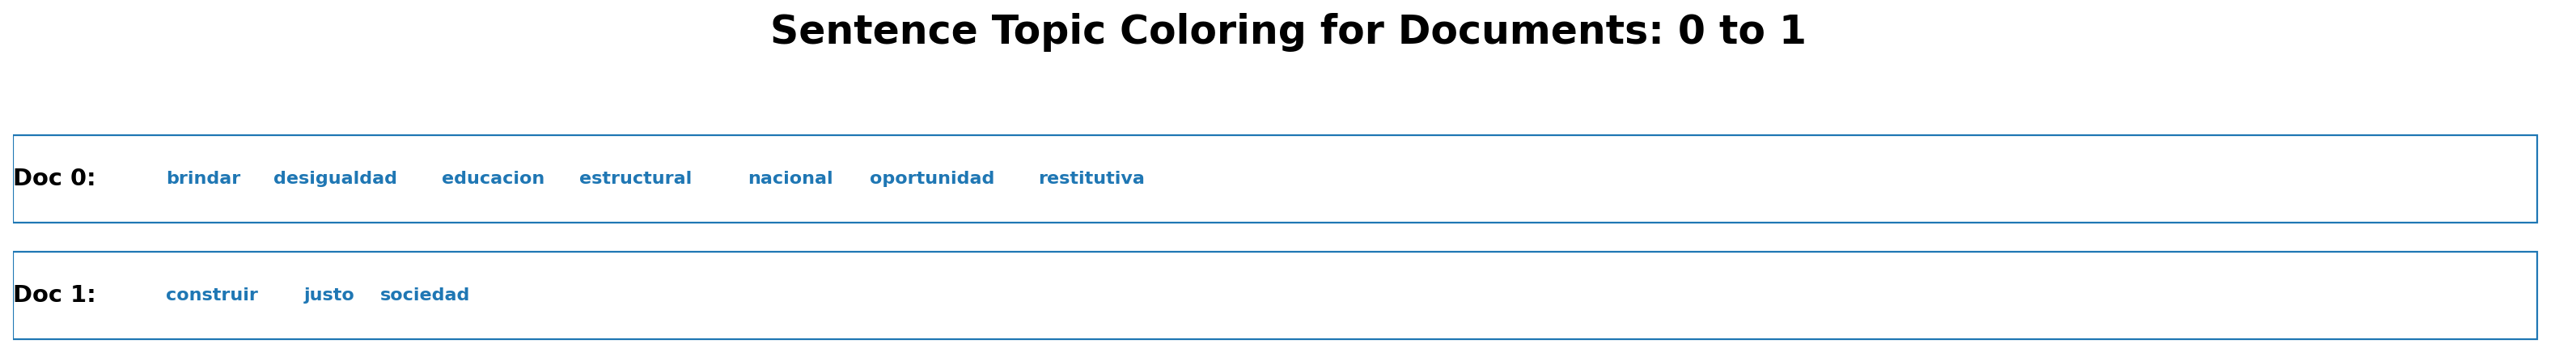

In [372]:
sentences_chart(id2word=id2word, corpus=corpus, num_topics= len(lsi_model.show_topics()),_model='LDA', end = 3)  

## TSNE topic clustering

In [375]:
import numpy as np
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
import matplotlib.colors as mcolors
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource


def tsne_plot(model_,corp,name_model,text,interactive_labels = True):
  # Get topic weights
  topic_weights = []
  for i, row_list in enumerate(model_[corp]):
    topic_weights.append([w for i, w in row_list])

  # Array of topic weights    
  arr = pd.DataFrame(topic_weights).fillna(0).values

  # Keep the well separated points (optional)
  arr = arr[np.amax(arr, axis=1) > 0.35]

  # Dominant topic number in each doc
  topic_num = np.argmax(arr, axis=1)

  # tSNE Dimension Reduction
  tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
  tsne_lda = tsne_model.fit_transform(arr)

  # Plot the Topic Clusters using Bokeh
  output_notebook()
  n_topics = len(model_.show_topics())
  mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
  if interactive_labels is False:
    plot = figure(title="t-SNE Clustering of {} {} Topics".format(n_topics,name_model), plot_width=900, plot_height=700)
    plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
    show(plot)
  else:
    df_dominant_topic = format_topics_sentences(model=model_, corpus=corp, texts=text)
    source = ColumnDataSource(dict(
    x=tsne_lda[:,0],
    y=tsne_lda[:,1],
    color=mycolors[topic_num],
    label=df_dominant_topic['Dominant_Topic'].apply(lambda s: 'Belongs to topic '+str(s)),
    topic_key= df_dominant_topic['Dominant_Topic'],
    title= df_dominant_topic['Text'],
    content = df_dominant_topic['Topic_Keywords']    
    ))
    title = "t-SNE Clustering of {} LDA Topics".format(n_topics)

    plot_lda = figure(plot_width=1500, plot_height=600,
                        title=title, tools="pan,wheel_zoom,box_zoom,reset,hover")

    plot_lda.scatter(x='x', y='y', source=source,legend_field='label',
                    color='color', alpha=0.8, size=5)#'msize', )

    # hover tools
    hover = plot_lda.select(dict(type=HoverTool))
    hover.tooltips = [
        ("Sentence", "@title"),
        ("KeyWords", "@content"),
        ("Topic", "@topic_key"),
    ]

    plot_lda.legend.location = "top_left"

    output_file('scatter_topics.html')
    show(plot_lda)


In [376]:

tsne_plot(model_=lda_model,corp=corpus,name_model='LDA',text=cleaned_doc_train,interactive_labels = True)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1329 samples in 0.001s...
[t-SNE] Computed neighbors for 1329 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1329
[t-SNE] Computed conditional probabilities for sample 1329 / 1329
[t-SNE] Mean sigma: 0.000775
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.343075
[t-SNE] KL divergence after 1000 iterations: 0.198299


In [377]:
tsne_plot(model_=lda_model,corp=corpus,name_model='LDA',text=cleaned_doc_train,interactive_labels = False)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1329 samples in 0.001s...
[t-SNE] Computed neighbors for 1329 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1329
[t-SNE] Computed conditional probabilities for sample 1329 / 1329
[t-SNE] Mean sigma: 0.000821
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.305016
[t-SNE] KL divergence after 1000 iterations: 0.199968


# Dataset results

In this section we used all the answers of the dataset and tested LSI and LDA models.

With the following example you can understand that although topic modeling is not as accurate as text classification, it is worth it if you don’t have enough time and resources to label your data.

In [99]:
print('The questions are: ')
for i in consulta.columns:
  print(i)

The questions are: 
P1 TRANSCRIPCIÓN: ¿Por qué cree ud. que Chile necesita una política de igualdad de género en CTCI?
P2 TRANSCRIPCIÓN: ¿Qué medidas cree usted que garantizan el acceso, el desarrollo y el liderazgo de mujeres en el sistema CTCI?
P3 TRANSCRIPCIÓN: Respecto al Eje 2, ¿de qué manera se podría incorporar la perspectiva de género en su disciplina o área de desempeño?
P4 TRANSCRIPCIÓN: Teniendo en cuenta el Eje 3, ¿qué acciones debería adoptar su institución  y otras instituciones del sistema de CTCI  para garantizar una  política de igualdad de género efectiva?


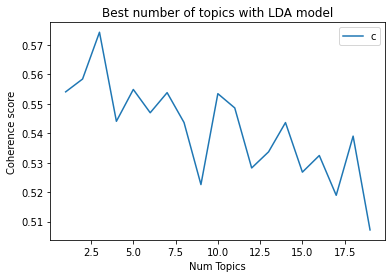

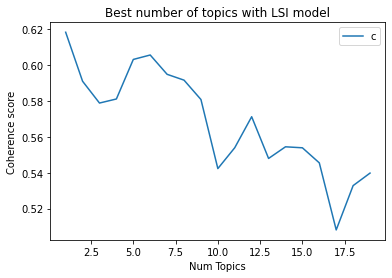

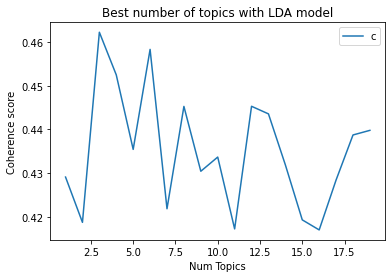

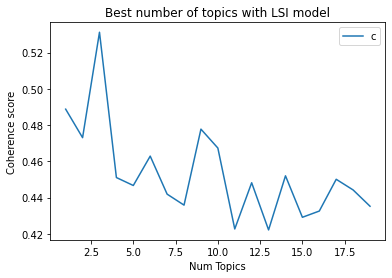

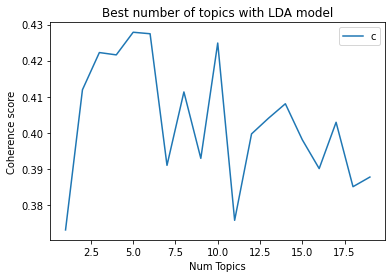

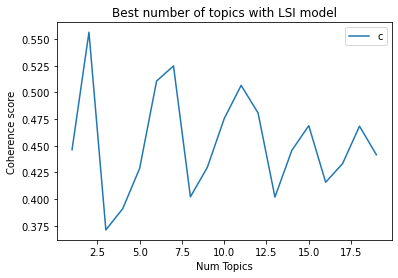

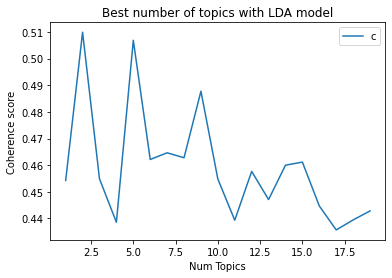

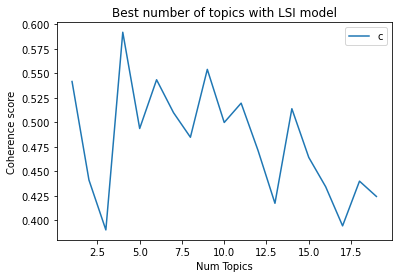

In [115]:
from itertools import repeat
preg = []; cs = []; ml =[]; top = []

for i in range(len(consulta.columns)):
  preg.extend(repeat(consulta.columns[i], 2))
  cleaned_doc_train,entities = sp.corpus(dataset=consulta[consulta.columns[i]].values.tolist())
  X_train_preprocessed = [" ".join(words_list) for words_list in cleaned_doc_train]
  id2word = corpora.Dictionary(cleaned_doc_train)
  corpus = [id2word.doc2bow(text) for text in cleaned_doc_train]

  ml.append('LDA')
  model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=cleaned_doc_train, start=1, limit=20, step=1, model_='LDA')
  cs.append(max(coherence_values))
  lda_model = model_list[coherence_values.index(max(coherence_values))]
  top.append(len(lda_model.show_topics()))

  ml.append('LSI')
  model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=cleaned_doc_train, start=1, limit=20, step=1, model_='LSI')
  cs.append(max(coherence_values))
  lsi_model = model_list[coherence_values.index(max(coherence_values))]
  top.append(len(lsi_model.show_topics()))





In [129]:
results = pd.DataFrame(data={'Pregunta':preg, 'Coherence Score':cs, 'Model':ml, '# topics':top})
results.sort_values('Coherence Score',ascending=False)

,Pregunta,Coherence Score,Model,# topics
1,P1 TRANSCRIPCIÓN: ¿Por qué cree ud. que Chile ...,0.618438,LSI,1
7,"P4 TRANSCRIPCIÓN: Teniendo en cuenta el Eje 3,...",0.592074,LSI,4
0,P1 TRANSCRIPCIÓN: ¿Por qué cree ud. que Chile ...,0.574315,LDA,3
5,"P3 TRANSCRIPCIÓN: Respecto al Eje 2, ¿de qué m...",0.556317,LSI,2
3,P2 TRANSCRIPCIÓN: ¿Qué medidas cree usted que ...,0.531241,LSI,3
6,"P4 TRANSCRIPCIÓN: Teniendo en cuenta el Eje 3,...",0.509919,LDA,2
2,P2 TRANSCRIPCIÓN: ¿Qué medidas cree usted que ...,0.462224,LDA,3
4,"P3 TRANSCRIPCIÓN: Respecto al Eje 2, ¿de qué m...",0.427886,LDA,5


# Using topic_modeling script

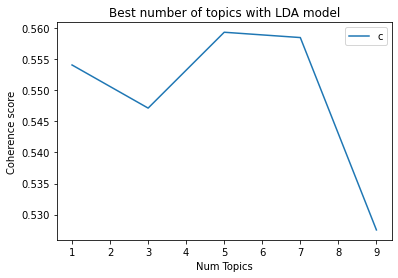

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1329 samples in 0.002s...
[t-SNE] Computed neighbors for 1329 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1329
[t-SNE] Computed conditional probabilities for sample 1329 / 1329
[t-SNE] Mean sigma: 0.000039
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.676888
[t-SNE] KL divergence after 1000 iterations: 0.171537


In [384]:
import topic_m as tm
import warnings

warnings.filterwarnings("ignore")
model_list, coherence_values = tm.compute_coherence_values(dictionary=id2word, corpus=corpus, id2word=id2word, texts=cleaned_doc_train, start=1, limit=10, step=2, model_='LDA')
lda_model = model_list[coherence_values.index(max(coherence_values))]
tm.tsne_plot(model_=lda_model,corp=corpus,name_model='LDA',text=cleaned_doc_train,interactive_labels = True)

In [385]:
tm.top_vocab(lda_model)

,Topic,Word,P
0,0,mujer,0.042240
1,0,genero,0.019894
2,0,ciencia,0.017825
3,0,existir,0.012777
4,0,brecha,0.010481
5,0,hombre,0.009702
6,0,desarrollo,0.009496
7,0,igualdad,0.008880
8,0,cientifico,0.008800
9,0,politico,0.007811


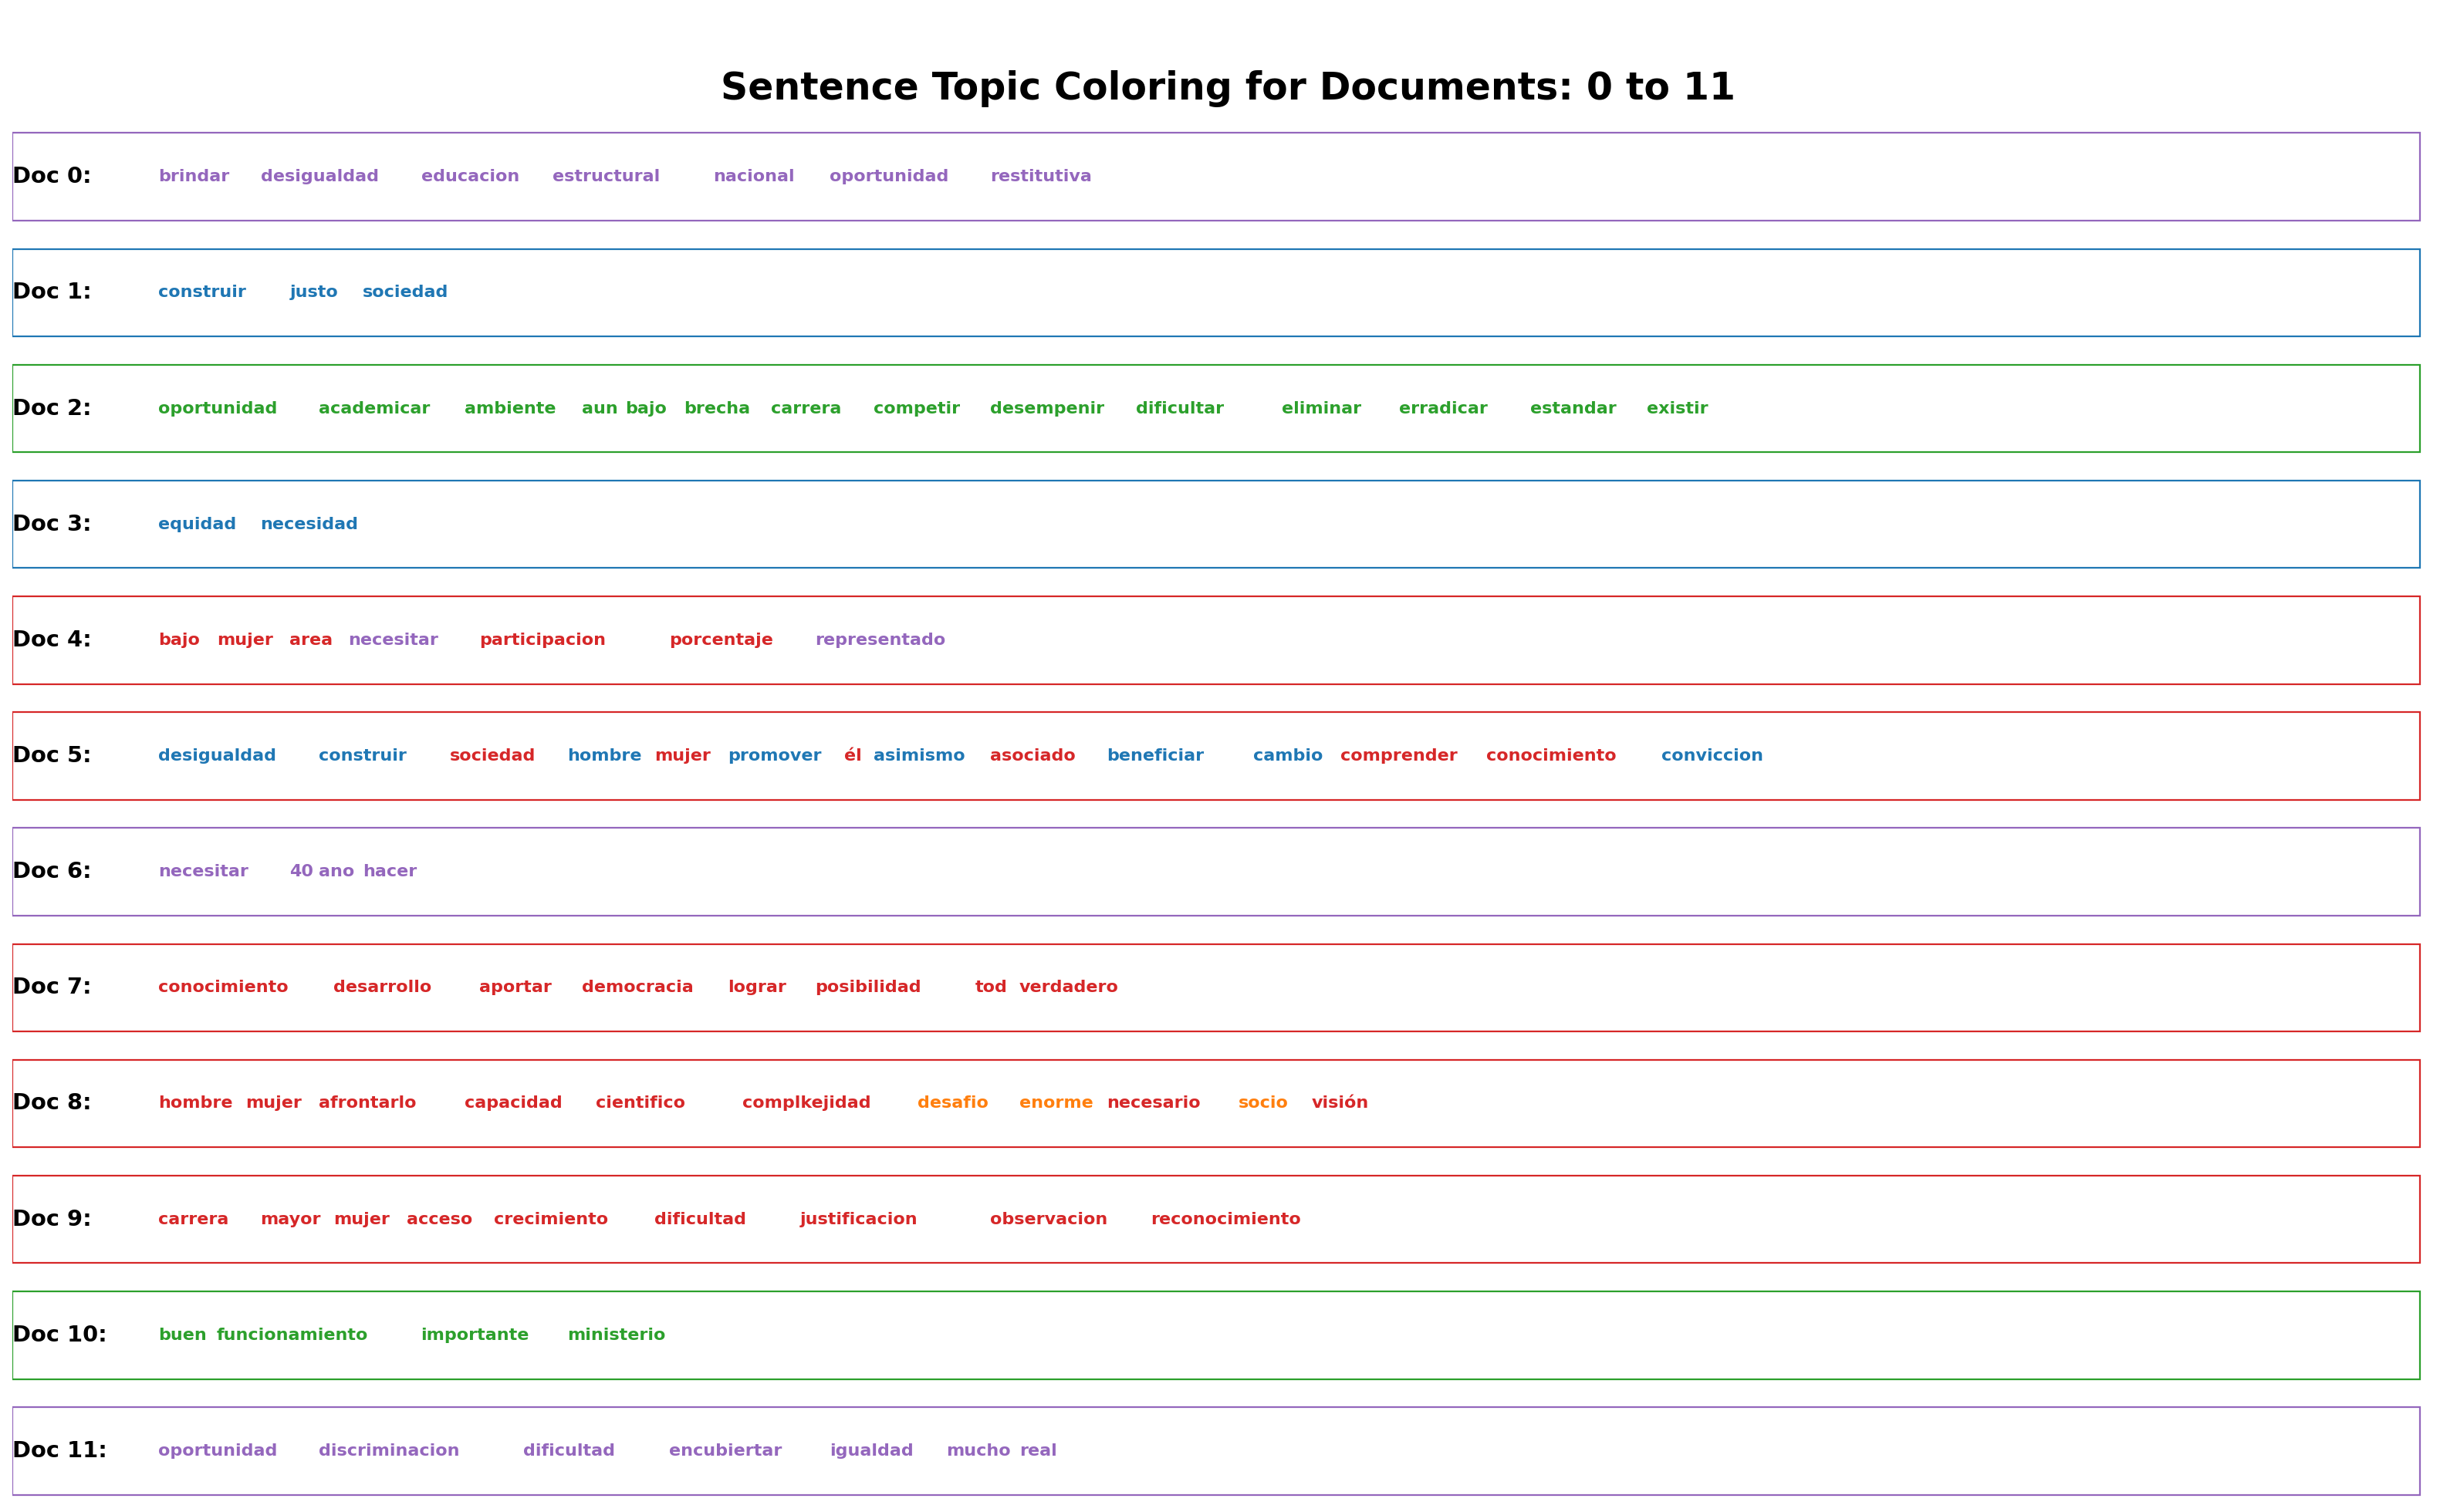

In [386]:
tm.sentences_chart(id2word=id2word, corpus=corpus, num_topics= len(lda_model.show_topics()))

In [387]:
tm.most_representative_sent(lda_model,corpus,cleaned_doc_train)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9967,"mujer, genero, ciencia, existir, brecha, hombre, desarrollo, igualdad, cientifico, politico","[creer, igualdad, genero, deberio, dar, él, ambito, ciencia, tecnologia, curso, menor, 13, 14, a..."
1,1.0,0.9927,"mujer, genero, igualdad, oportunidad, deber, ser, ciencia, hombre, desarrollo, ctci","[regla, claro, igualitaria, ayudar, ganar, mejor, aquel, discriminar, positiva, negativamente, c..."
2,2.0,0.9985,"genero, mujer, si, necesitar, igualdad, hombre, desarrollo, deber, creer, ciencia","[chile, necesitar, politico, igualdad, genero, razón, 1, diferencia, porcentaj, matricula, hombr..."
3,3.0,0.9934,"genero, ctci, mujer, necesario, igualdad, ser, deber, conocimiento, area, existir","[brechos, genero, pais, similar, país, diferenciar, varios, alto, porcentaje, persona, alto, niv..."
4,4.0,0.9923,"mujer, genero, igualdad, hombre, existir, oportunidad, brecha, ser, poder, mismo","[arear, historicamente, alejado, mujer, desarrollar, vez, realizo, insercion, este, ser, continu..."


In [388]:
tm.format_topics_sentences(model=lda_model, corpus=corpus, texts=cleaned_doc_train)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,4.0,0.8982,"mujer, genero, igualdad, hombre, existir, oportunidad, brecha, ser, poder, mismo","[brindar, oportunidad, restitutiva, desigualdad, estructural, educacion, nacional]"
1,1.0,0.7961,"mujer, genero, igualdad, oportunidad, deber, ser, ciencia, hombre, desarrollo, ctci","[construir, sociedad, justo]"
2,4.0,0.6654,"mujer, genero, igualdad, hombre, existir, oportunidad, brecha, ser, poder, mismo","[eliminar, brecha, obstaculo, dificultar, carrera, academicar, mujer, erradicar, mala, practica,..."
3,1.0,0.7267,"mujer, genero, igualdad, oportunidad, deber, ser, ciencia, hombre, desarrollo, ctci","[necesidad, equidad]"
4,2.0,0.8976,"genero, mujer, si, necesitar, igualdad, hombre, desarrollo, deber, creer, ciencia","[porcentaje, participacion, mujer, bajo, area, necesitar, representado]"
...,...,...,...,...
1324,1.0,0.4776,"mujer, genero, igualdad, oportunidad, deber, ser, ciencia, hombre, desarrollo, ctci","[sistema, funcionamiento, gobernado, estructura, patriarcal, cambiar, solo, sino, necesitar, ini..."
1325,0.0,0.9761,"mujer, genero, ciencia, existir, brecha, hombre, desarrollo, igualdad, cientifico, politico","[trav, historia, mantenido, realidad, desigual, cuanto, acceso, capacitacion, mantenimiento, rec..."
1326,2.0,0.6285,"genero, mujer, si, necesitar, igualdad, hombre, desarrollo, deber, creer, ciencia","[ser, mencionar, demostrado, desarrollo, competitivo, sostenible, pais, condicionado, sustentado..."
1327,4.0,0.7956,"mujer, genero, igualdad, hombre, existir, oportunidad, brecha, ser, poder, mismo","[brecha, genero, preocupante]"


In [389]:
tm.LDA_visual(lda_model,8,corpus,id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.039475 -0.006429       1        1  33.031321
1     -0.015046  0.039134       2        1  26.150170
4     -0.010280 -0.007904       3        1  15.452324
2      0.016578 -0.045811       4        1  15.041306
3      0.048222  0.021011       5        1  10.324878, topic_info=          Term        Freq       Total Category  logprob  loglift
62      genero  470.000000  470.000000  Default   8.0000   8.0000
172         si  122.000000  122.000000  Default   7.0000   7.0000
94   necesario  105.000000  105.000000  Default   6.0000   6.0000
44   necesitar  137.000000  137.000000  Default   5.0000   5.0000
183       ctci  138.000000  138.000000  Default   4.0000   4.0000
..         ...         ...         ...      ...      ...      ...
108   igualdad   24.491834  267.288635   Topic5  -4.5310  -0.1194
77        todo   14.459740   98.830656   Topic5  -5.0580   0.3486
171        ser   19.385236  198.936703   Topic5  -4.7648  -0.0579
56       deber   18.264571  179.659734   Topic5  -4.8244  -0.0155
31       mujer   27.358799  652.569506   Topic5  -4.4203  -0.9013

[123 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2127      2  0.738299    abusivo
3234      5  0.648939  adquirido
1109      4  0.796944        ala
122       1  0.311217     ambito
122       2  0.148199     ambito
...     ...       ...        ...
119       1  0.387968  violencia
119       2  0.110848  violencia
119       3  0.110848  violencia
119       4  0.055424  violencia
119       5  0.332544  violencia

[277 rows x 3 columns], R=8, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 3, 4])

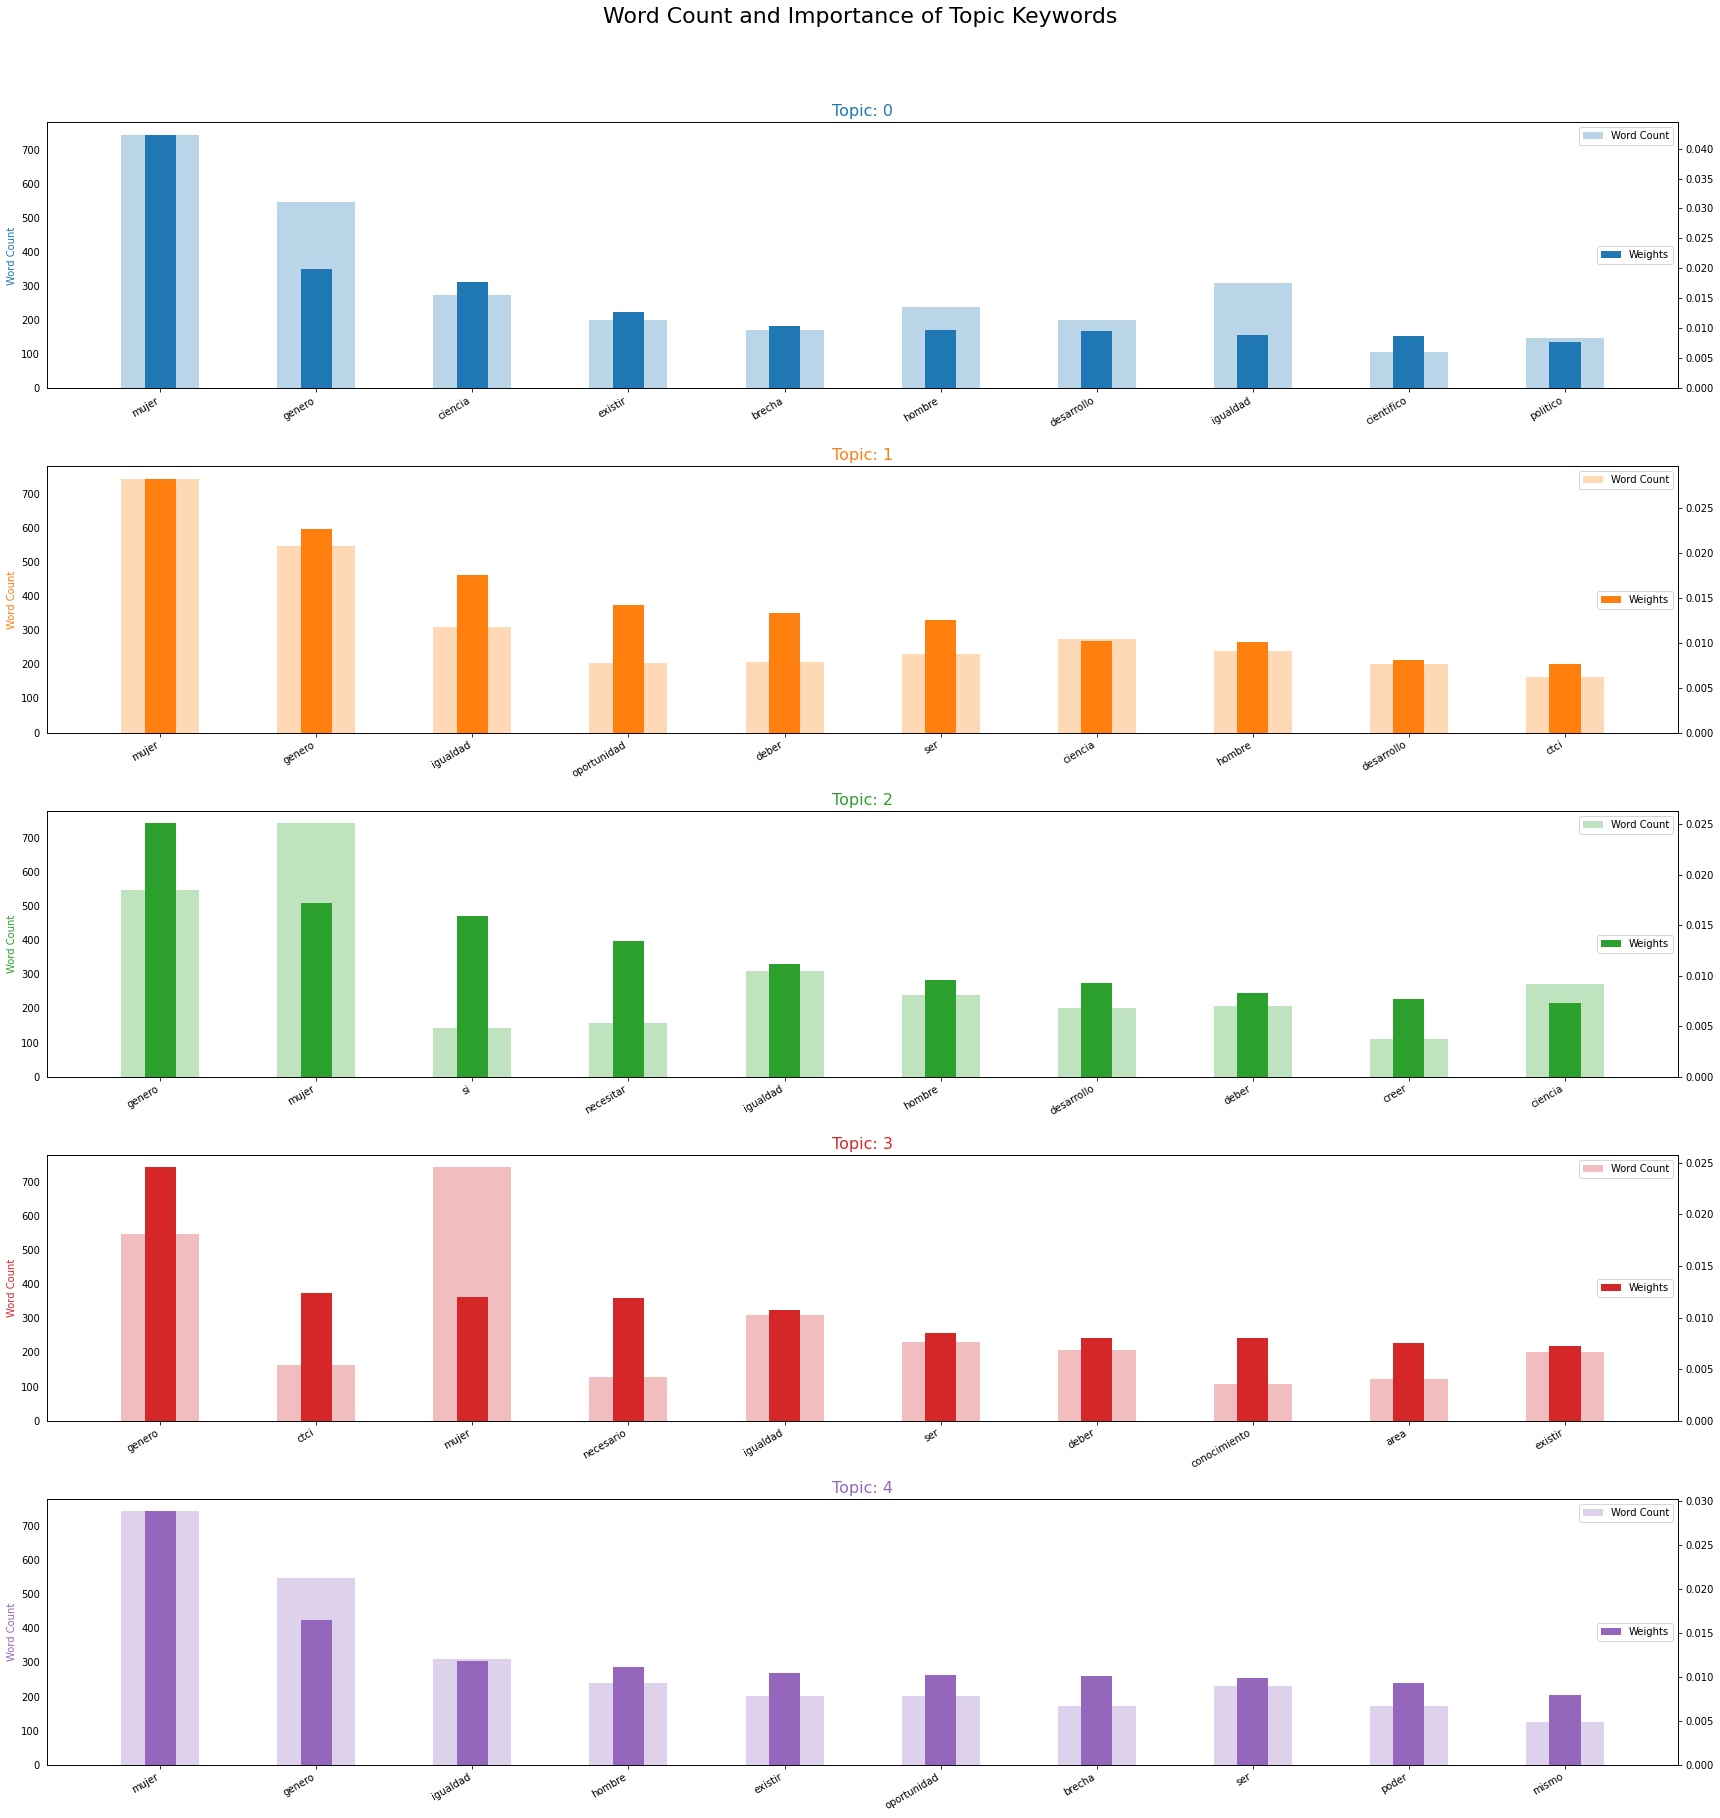

In [392]:
df = tm.word_count_weight_keywords(lda_model, cleaned_doc_train, (24,24))

# Sources:

* https://moj-analytical-services.github.io/NLP-guidance/LDA.html
* https://www.geeksforgeeks.org/generating-word-cloud-python/
* https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python
* https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#6.-What-is-the-Dominant-topic-and-its-percentage-contribution-in-each-document